 # MOOCCUBEX Data Analysis

### The name of the  used data file is user-problem.json. Because the size of this file is about 21GB, so we choose every record randomly.There is a  1% possibility that a record may be chosen.

|Field    |description                      |   
|:----------|:----------                     |   
|log_id   |ID of the user's question record, combined with a unique key of user_id and problem_id |
|user_id |User ID, starting with U_|
|problem_id	|Problem ID, starting with Pm_|
|is_correct	|Is the question correct|
|attempts	|Number of attempted questions|
|score	|score|
|submit_time	|Question time|

In [1]:
import numpy as np
import pandas as pd
import random 
import re
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import json

In [2]:
r_file=open("user-problem.json","r")

In [3]:
length = 0
num = 0
arr,chunks=[],[]
while(True) :
    line = r_file.readline()
    if not line :
        chunks.append(pd.DataFrame(arr))
        arr = []
        break
    if (random.randint(1,100))%100 == 1 :
        text = json.loads(line)
        arr.append(text.values())
        length += 1
        if length == 100000 :
            chunks.append(pd.DataFrame(arr))
            arr = []
            length = 0
df=pd.concat(chunks,ignore_index=True)

In [4]:
chunks.clear()
arr.clear()
# Clear the memory of temporary variable

In [5]:
df.columns=['log_id','problem_id','user_id','is_correct','attempts','score','submit_time']
# Reset the index

## general feature 

In [6]:
df.head()

,log_id,problem_id,user_id,is_correct,attempts,score,submit_time
0,10000130_3803141,Pm_3803141,U_10000130,0,1,-1.0,2020-06-11 23:12:05
1,1000038_5901223,Pm_5901223,U_1000038,0,1,NaN,2020-12-09 15:30:55
2,10000444_5577605,Pm_5577605,U_10000444,0,2,-1.0,2020-07-17 00:32:37
3,10000611_3547813,Pm_3547813,U_10000611,0,31,40.0,2020-05-07 23:24:14
4,10000675_4482263,Pm_4482263,U_10000675,0,2,-1.0,2020-07-18 15:08:27


In [7]:
print("the number of records:")
print(df['log_id'].count())

the number of records:
1334084


In [8]:
print('Part of missing values for every column')
print(df.isnull().sum() / len(df))

Part of missing values for every column
log_id         0.000000
problem_id     0.000000
user_id        0.000000
is_correct     0.000000
attempts       0.000000
score          0.531092
submit_time    0.000000
dtype: float64


In [9]:
print("the number of users")
len(df.user_id.unique())

the number of users


583001

In [10]:
print("the number of  problems")
len(df.problem_id.unique())

the number of  problems


415951

## sort by user_id

In [11]:
ds = df['user_id'].value_counts().reset_index() 

In [12]:
ds.columns = [
    'user_id',
    'count'
]

In [13]:
ds['user_id'] = ds['user_id'].astype(str) + '-' 
#Transform 'int' type to 'str' type.If not,the program error would be caused by the type of the Y-axis.

In [14]:
ds = ds.sort_values(['count']).tail(50)

In [15]:
fig = px.bar(
    ds,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 50 users by the number of solving problem'
)

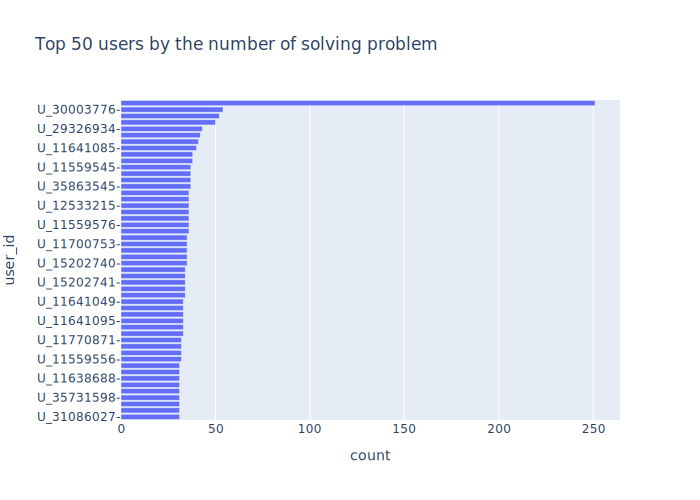

In [16]:
fig.show("svg")

In [17]:
ds = df['user_id'].value_counts().reset_index() 

In [18]:
ds.columns = [
    'user_id',
    'count'
]

In [19]:
ds= ds.astype(str)
ds = ds.applymap(lambda x: re.sub(r'U_','', x))
ds = ds.astype(int)
ds = ds.sort_values('user_id')

In [20]:
fig = px.histogram(
    ds,
    x = 'user_id',
    y = 'count',
    title = 'User solving problem distribution'
)

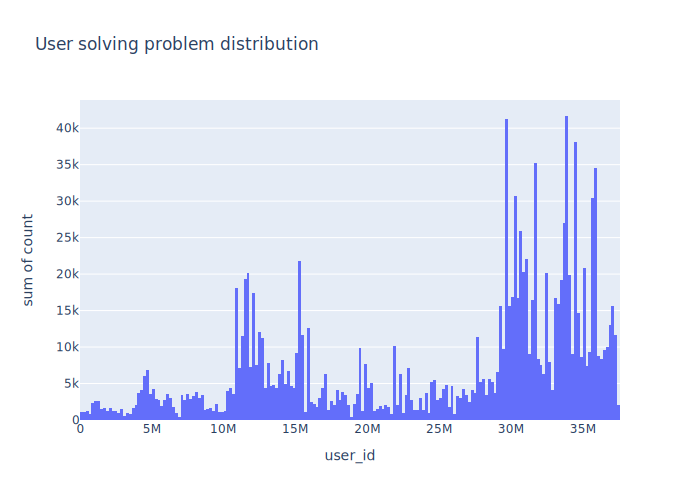

In [21]:
fig.show("svg")

## Sort by correct answer

In [22]:
ds = df['is_correct'].value_counts().reset_index()

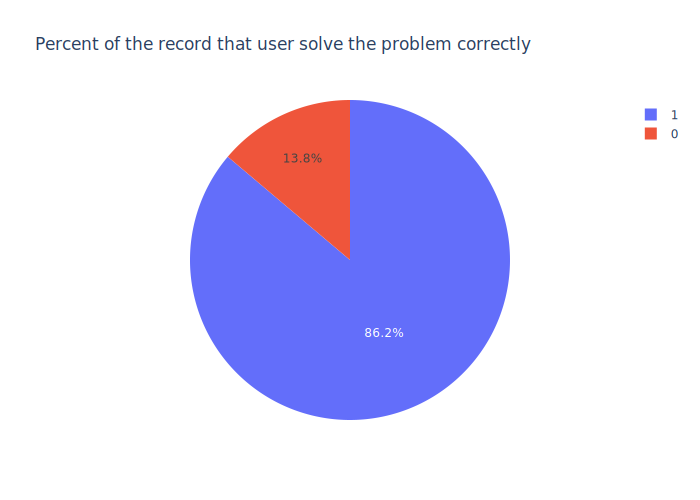

In [23]:
ds.columns = [
    'is_correct',
    'percent'
]
ds['percent'] /= len(df)
ds = ds.sort_values(['percent'])
fig = px.pie(
    ds,
    names = ['0', '1'],
    values = 'percent',
    title = 'Percent of the record that user solve the problem correctly '    
)

fig.show("svg")

## Sorted by submit_time

In [24]:
ds=df['submit_time']

In [25]:
ds=pd.DataFrame(ds)

In [26]:
ds = ds.applymap(lambda x: x[0:7])

In [27]:
ds = ds.sort_values(['submit_time'])

In [28]:
ds = ds['submit_time'].value_counts().reset_index()

In [29]:
ds.columns=[
    'submit_time',
    'count'
]

In [30]:
fig = px.bar(
    ds,
    x = 'submit_time',
    y = 'count',
    title = 'User solving problem date distribution'
)

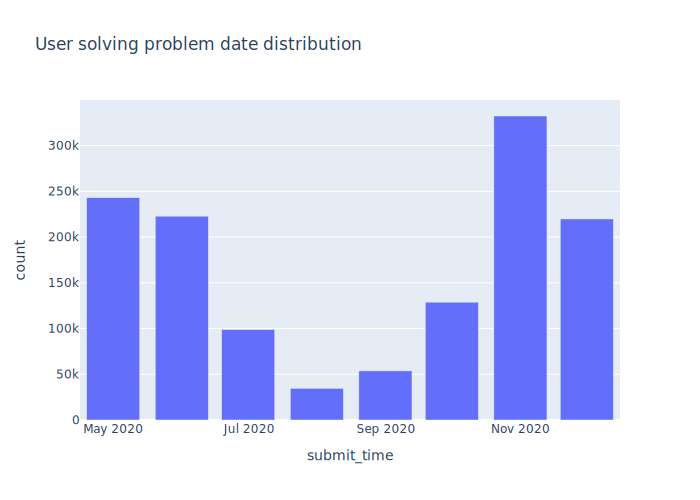

In [31]:
fig.show("svg")

## Sorted by attempts

In [32]:
grouped=df.groupby(by=['problem_id'],as_index=False)

In [33]:
series=grouped['attempts'].mean()

In [34]:
series = series.sort_values(['attempts']).tail(50)

In [35]:
fig = px.bar(
    series,
    x = 'attempts',
    y = 'problem_id',
    orientation='h',
    title='Top 50 problems with the highest average number of attempts'
)

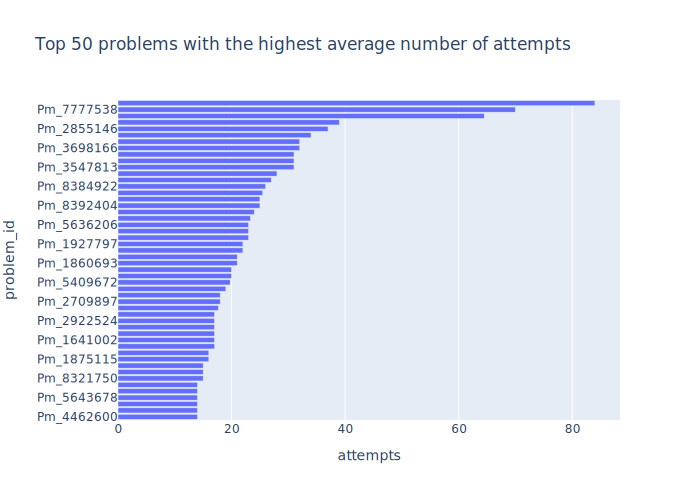

In [36]:
fig.show("svg")

## sorted by problem_id

In [37]:
ds = df['problem_id'].value_counts().reset_index()

In [38]:
ds.columns = [
    'problem_id', 
    'count'
]

In [39]:
ds = ds.sort_values('problem_id')

In [40]:
ds= ds.astype(str)
ds = ds.applymap(lambda x: re.sub(r'Pm_','', x))
ds = ds.astype(int)

In [41]:
fig = px.histogram(
    ds, 
    x='problem_id', 
    y='count', 
    title="records distribution on problem_id"
)

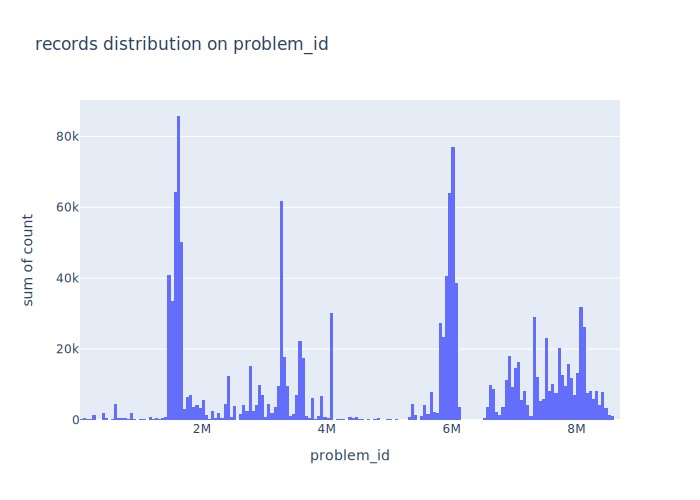

In [42]:
fig.show("svg")

## sorted by score

In [43]:
grouped=df.groupby(by=['user_id'],as_index=False)

In [44]:
series=grouped['score'].mean()

In [45]:
ds=series['score'].value_counts().reset_index()

In [46]:
ds.columns=[
    'avg_score',
    'count'
]

In [47]:
ds=ds.sort_values(['avg_score'])

In [48]:
fig = px.histogram(
    ds, 
    x='avg_score', 
    y='count', 
    title='average score distribution'
)

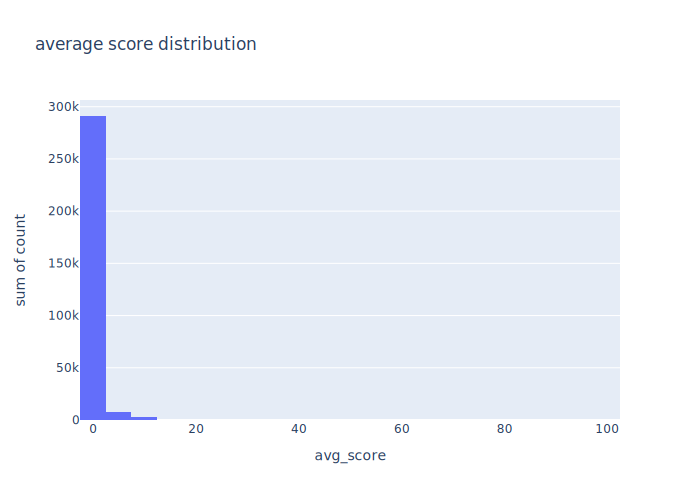

In [49]:
fig.show("svg")

In [50]:
grouped=df.groupby(by=['problem_id'],as_index=False)

In [51]:
series=grouped['score'].mean()
series=series.dropna(axis=0,how='any')

In [52]:
series.columns=[
    'problem_id',
    'avg_score'
]

In [53]:
series=series.sort_values(['avg_score']).tail(50)

In [54]:
fig = px.bar(
    series,
    x = 'avg_score',
    y = 'problem_id',
    orientation='h',
    title='Top 50 problems that have a high score'
)

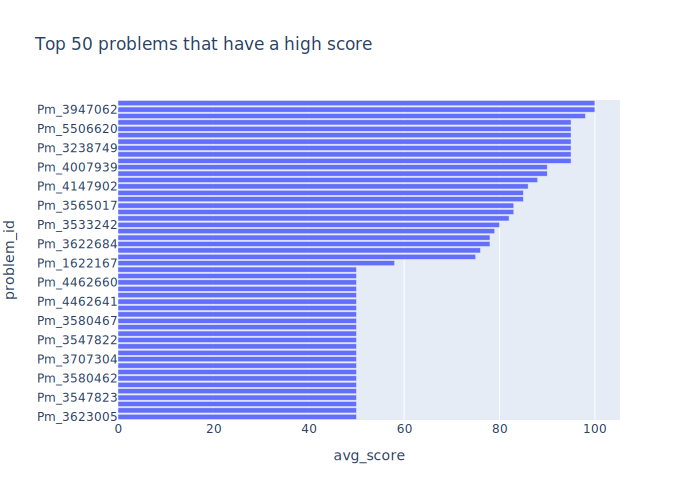

In [55]:
fig.show("svg")